# BIG DATA ANALYTICS COM <font color='green'>PYSPARK</font>

In [ ]:
# importando bibliotecas
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

from pyspark.sql import (SparkSession)
from pyspark.sql.types import StructType, StructField, StringType, DoubleType, IntegerType, DateType
from pyspark.sql.functions import col, sum, countDistinct, count, isnan, when, regexp_replace, split, month, year, size, element_at, struct, trim, avg, expr, lit
from pyspark.sql import functions as F
from pyspark.sql.window import Window

## Operações Básicas com PySpark

In [2]:
# Criando SparkSession
spark = (SparkSession.builder
         .appName("AmazonElectronics")
         .getOrCreate())

In [3]:
# Definindo Schema
schema = StructType([
    StructField("timestamp", DateType(), True),
    StructField("asin", StringType(), True),
    StructField("brand", StringType(), True),
    StructField("buybox_seller", StringType(), True),
    StructField("final_price", StringType(), True),
    StructField("number_of_sellers", IntegerType(), True),
    StructField("root_bs_rank", IntegerType(), True),
    StructField("reviews_count", IntegerType(), True),
    StructField("currency", StringType(), True),
    StructField("image_url", StringType(), True),
    StructField("images_count", IntegerType(), True),
    StructField("title", StringType(), True),
    StructField("url", StringType(), True),
    StructField("video_count", IntegerType(), True),
    StructField("categories", StringType(), True),
    StructField("item_weight", StringType(), True),
    StructField("rating", DoubleType(), True),
    StructField("seller_id", StringType(), True),
    StructField("availability", StringType(), True),
    StructField("product_dimensions", StringType(), True),
    StructField("discount", StringType(), True),
    StructField("initial_price", StringType(), True),
    StructField("description", StringType(), True),
    StructField("image", StringType(), True),
    StructField("answered_questions", IntegerType(), True),
    StructField("date_first_available", StringType(), True),
    StructField("model_number", StringType(), True),
    StructField("manufacturer", StringType(), True),
    StructField("department", StringType(), True),
    StructField("plus_content", StringType(), True),
    StructField("upc", StringType(), True),
    StructField("video", StringType(), True),
])

In [4]:
# Definindo o caminho do arquivo .csv
file_path = '.\\amazon_electronics.csv'

# Start timer
start_time = time.time()

# (Read) Lendo arquivo .csv e atribuindo a um DataFrame
df = spark.read.csv(file_path, schema=schema, header=True, quote='"',escape='"')

# Fim timer
end_time = time.time()

# Calculando o tempo de execução
exec_time = (end_time - start_time)

# Get número de linhas DataFrame
num_rows = df.count()

# Get número de colunas DataFrame
num_columns = len(df.columns)

# Exibindo Shape
print("Shape:{} linhas e {} colunas".format(num_rows, num_columns))

# Exibindo o tempo de execução
print("Tempo de Execução usando PySpark:",exec_time,"segundos")

Shape:1000 linhas e 32 colunas
Tempo de Execução usando PySpark: 1.6812539100646973 segundos


In [5]:
# Exibindo o máximo de 34 colunas para que possamos percorrer todo o nosso Dataset horizontalmente 
pd.options.display.max_columns = 32

In [6]:
# Checando as primeiras 6 linhas do DataFrame
df.limit(6).toPandas()

,timestamp,asin,brand,buybox_seller,final_price,number_of_sellers,root_bs_rank,reviews_count,currency,image_url,images_count,title,url,video_count,categories,item_weight,rating,seller_id,availability,product_dimensions,discount,initial_price,description,image,answered_questions,date_first_available,model_number,manufacturer,department,plus_content,upc,video
0,2023-08-03,B07RGHBLGC,SHNITPWR,SNT-POWER,13.99,1,NaN,234,USD,https://m.media-amazon.com/images/I/61qDGTATaL...,7,SHNITPWR 12V 6A AC DC Power Supply Adapter Con...,https://www.amazon.com/SHNITPWR-Converter-100V...,0,"Electronics,Power Accessories,AC Adapters",400 Grams,4.4,A2QEP0IMOO32F1,In Stock,8 x 5 x 2 inches,42,23.99,"About this item Input: AC 100 - 240V, 50 / 60H...",https://m.media-amazon.com/images/I/61qDGTATaL...,0,"May 10, 2019",SNT-1206,SHNITPWR,null,true,null,false
1,2023-08-15,B09871LZYT,FINTIE,Fintie,15.99,2,12194.0,1576,USD,https://m.media-amazon.com/images/I/81Adh+cGYc...,1,Fintie Silicone Case for All-New Fire HD 10 an...,https://www.amazon.com/Fintie-Silicone-All-New...,0,"Electronics,Computers & Accessories,Tablet Acc...",7.4 ounces,4.7,A3A3E6QGUGPEMU,In Stock,5.12 x 1.77 x 0.67 inches,-52%,32.99,Specifically designed for All-New Amazon Fire ...,https://m.media-amazon.com/images/I/81Adh+cGYc...,0,"March 15, 2021",EKAR025,FINTIE,null,true,null,false
2,2023-08-16,B09W9BXT9Z,Nixplay,Amazon.com,219.99,3,366.0,1998,USD,https://m.media-amazon.com/images/I/71iSS-r+KJ...,1,Nixplay 10.1 inch Touch Screen Digital Picture...,https://www.amazon.com/Nixplay-Digital-W10K-Po...,0,"Electronics,Camera & Photo,Lighting & Studio,P...",1.63 pounds,4.6,ATVPDKIKX0DER,Only 5 left in stock - order soon,10.55 x 4.65 x 0.99 inches,-25%,219.99,Nixplay Digital Picture Frame with Touch Scree...,https://m.media-amazon.com/images/I/71iSS-r+KJ...,0,"April 6, 2022",W10K - Polished Steel,Nixplay,null,false,null,false
3,2022-10-13,B093F837T9,Sound Storm Laboratories,"Speece, Inc.",$335.99,2,45741.0,324,$,https://m.media-amazon.com/images/I/71DXeNXt84...,5,Sound Storm Laboratories SDML10ACP Single Din ...,https://www.amazon.com/dp/B093F837T9?language=...,1,"Electronics,Car & Vehicle Electronics,Car Elec...",5.45 pounds,4.1,ABO907060G8YG,In Stock.,4.94 x 7.01 x 1.97 inches,null,null,Sound Storm Laboratories SDML10ACP Apple CarPl...,https://m.media-amazon.com/images/I/71DXeNXt84...,146,"January 21, 2021",SDML10ACP,Sound Storm Laboratories,null,true,null,true
4,2024-02-04,B0C2YQ9BJ1,Redragon,Redragon Shop,39.99,1,91.0,8219,USD,https://m.media-amazon.com/images/I/71chbo4DCq...,1,"Redragon GS520 RGB Desktop Speakers, 2.0 Chann...",https://www.amazon.com/Redragon-GS520-Speakers...,0,"Electronics,Computers & Accessories,Computer A...",0.071 ounces,4.4,A2FK9EP27A6ZE6,In Stock,7.36 x 4.33 x 6.69 inches,-5%,41.99,"Plug & Play, Broad Compatibility USB powered w...",https://m.media-amazon.com/images/I/71chbo4DCq...,0,"August 24, 2020",GS520,Redragon,Electronics,true,null,false
5,2024-01-21,B08D3Y5PFZ,AOC,Amazon.com,129.99,18,2417.0,14803,USD,https://m.media-amazon.com/images/I/71aXlu6n1q...,1,"AOC C24G1A 24"" Curved Frameless Gaming Monitor...",https://www.amazon.com/AOC-C24G1A-Frameless-19...,0,"Electronics,Computers & Accessories,Monitors",9.92 pounds,4.7,ATVPDKIKX0DER,In Stock,9.64 x 21.14 x 20.19 inches,-13%,149.99,AOC C24G1A 24-inch Class Curved Gaming Monitor...,https://m.media-amazon.com/images/I/71aXlu6n1q...,0,"September 15, 2020",C24G1A,AOC,Electronics,true,null,false


In [7]:
df.limit(6).collect()

[Row(timestamp=datetime.date(2023, 8, 3), asin='B07RGHBLGC', brand='SHNITPWR', buybox_seller='SNT-POWER', final_price='13.99', number_of_sellers=1, root_bs_rank=None, reviews_count=234, currency='USD', image_url='https://m.media-amazon.com/images/I/61qDGTATaLL.__AC_SX300_SY300_QL70_FMwebp_.jpg', images_count=7, title='SHNITPWR 12V 6A AC DC Power Supply Adapter Converter 100V~240V AC to DC 12 Volt 6 Amp 72W LED Driver Transformer with 5.5x2.5mm Plug for 5050 3528 LED Strip 3D Printer CCTV Security System LCD Monitor', url='https://www.amazon.com/SHNITPWR-Converter-100V-240V-Transformer-5-5x2-5mm/dp/B07RGHBLGC', video_count=0, categories='Electronics,Power Accessories,AC Adapters', item_weight='400 Grams', rating=4.4, seller_id='A2QEP0IMOO32F1', availability='In Stock', product_dimensions='8 x 5 x 2 inches', discount='42', initial_price='23.99', description="About this item Input: AC 100 - 240V, 50 / 60Hz ; Output: DC 12V, Max 6A, 72W ; It can supply with all amperage less than 6A. ---su

In [8]:
# Selecionando colunas específicas
df.select('brand','title','images_count','video_count').limit(5).toPandas()

,brand,title,images_count,video_count
0,SHNITPWR,SHNITPWR 12V 6A AC DC Power Supply Adapter Con...,7,0
1,FINTIE,Fintie Silicone Case for All-New Fire HD 10 an...,1,0
2,Nixplay,Nixplay 10.1 inch Touch Screen Digital Picture...,1,0
3,Sound Storm Laboratories,Sound Storm Laboratories SDML10ACP Single Din ...,5,1
4,Redragon,"Redragon GS520 RGB Desktop Speakers, 2.0 Chann...",1,0


In [9]:
# Verificando se o ASIN (Amazon Standard Identification Number) é único (UNIQUE)
# O método collect() retona uma lista de linhas.[0] é usado para acessar a primeira linha na lista,
# e [0] de novo é usado para acessar o primeiro elemento (a contagem de valores distintos) na linha

df.agg(countDistinct("asin")).collect()[0][0]

1000

In [10]:
# Outra alternativa é agrupar e contar todas as linhas 
(df.groupby('asin').count()).count()

1000

In [11]:
# Filtrando o DataFrame para uma marca específica 
df.filter(col('brand') == 'SanDisk').limit(3).toPandas()

,timestamp,asin,brand,buybox_seller,final_price,number_of_sellers,root_bs_rank,reviews_count,currency,image_url,images_count,title,url,video_count,categories,item_weight,rating,seller_id,availability,product_dimensions,discount,initial_price,description,image,answered_questions,date_first_available,model_number,manufacturer,department,plus_content,upc,video
0,2024-02-04,B09X7DY7Q4,SanDisk,CalvinNHobbs,13.25,19,44,9779,USD,https://m.media-amazon.com/images/I/814l26oR+7...,1,SanDisk 64GB Extreme SDXC UHS-I Memory Card - ...,https://www.amazon.com/SanDisk-Extreme-UHS-I-M...,0,"Electronics,Computers & Accessories,Computer A...",0.071 ounces,4.8,A2NDNAPHQ3UDKH,Only 2 left in stock - order soon.,0.09 x 0.94 x 1.26 inches,-12%,14.99,With the SanDisk Extreme SD UHS-I memory card ...,https://m.media-amazon.com/images/I/814l26oR+7...,0,"June 16, 2022",SDSDXV2-064G-GNCIN,"Western Digital Technologies, Inc.",Electronics,true,null,false
1,2024-01-16,B07SSZ8W38,SanDisk,Amazon.com,9,11,227,6204,USD,https://m.media-amazon.com/images/I/51jPauko63...,1,SanDisk 64GB Ultra Luxe USB 3.1 Gen 1 Flash Dr...,https://www.amazon.com/SanDisk-64GB-Ultra-Flas...,0,"Electronics,Computers & Accessories,Data Stora...",0.05 ounces,4.5,ATVPDKIKX0DER,In Stock,1.57 x 0.62 x 0.23 inches,-50%,17.99,Combine the necessity for a convenient way to ...,https://m.media-amazon.com/images/I/51jPauko63...,0,"June 28, 2019",SDCZ74-064G-A46,"Western Digital Technologies, Inc.",Electronics,true,null,false
2,2023-08-25,B0000D8CMK,SanDisk,espee7,25.93,4,482,175,USD,https://m.media-amazon.com/images/I/51pU5lLQcW...,1,SanDisk SD - Flash Memory Card - 512 MB - SD,https://www.amazon.com/SanDisk-SD-Flash-Memory...,0,"Electronics,Computers & Accessories,Computer A...",0.071 ounces,4.2,A2OR3WSDZ5KM01,In Stock,0.94 x 1.26 x 0.08 inches,-42%,44.95,SanDisk Corporation is the world's largest sup...,https://m.media-amazon.com/images/I/51pU5lLQcW...,0,"July 20, 2007",SDSDB-512-E10,SanDisk Corporation,null,false,null,false


In [12]:
# Filtrando o DataFrame por produtos com mais de 5 imagens
df.filter(col('images_count') > 5).select('asin','title','brand','images_count').limit(5).toPandas()

,asin,title,brand,images_count
0,B07RGHBLGC,SHNITPWR 12V 6A AC DC Power Supply Adapter Con...,SHNITPWR,7
1,B016YJWJ6S,Elgato Game Capture HD60 - Next Generation Gam...,Corsair,6
2,B01EKARUUS,StarTech.com USB-C Multiport Adapter - USB-C T...,StarTech,9
3,B0875NRKTP,Tz Tape 12mm 0.47 Laminated Clear Replacement ...,COLORWING,8
4,B08B34C5Y7,GearIT HDMI Cable (10-Pack / 6.6ft / 2m) High-...,GearIT,7


In [13]:
 # Filtrando o DataFrame por produtos com mais de 5 imagens AND mais de 5 videos
df.filter((col('images_count') > 5) & (col('video_count') > 5)).select('asin','title','brand','images_count','video_count').limit(5).toPandas()

,asin,title,brand,images_count,video_count
0,B09BDDSDTC,Sony SRS-XG500 X-Series Wireless Portable Blue...,Sony,14,6
1,B08QCLVJBM,Leayjeen Kids Digital Video Camera Case Compat...,Leayjeen,6,6
2,B087NHNVT5,Linklike Wired Earbuds with Microphone Extra B...,Linklike,8,6
3,B09PFNNQ9N,FRAMEO Digital Photo Frame 10.1 inch WiFi Smar...,dxmart,9,6
4,B0921ZK2FK,Leayjeen Kids Digital Video Camera Case Compat...,Leayjeen,6,6


## Limpeza e Transformação de Dados

### Mantendo apenas as colunas de interesse

In [14]:
cols = ['timestamp', 'asin', 'brand', 'initial_price', 'final_price', 'reviews_count', 'images_count', 'title', 'url', 'video_count', 'rating', 'categories']

df = df.select(cols)

In [15]:
df.limit(1000).toPandas()

,timestamp,asin,brand,initial_price,final_price,reviews_count,images_count,title,url,video_count,rating,categories
0,2023-08-03,B07RGHBLGC,SHNITPWR,23.99,13.99,234,7,SHNITPWR 12V 6A AC DC Power Supply Adapter Con...,https://www.amazon.com/SHNITPWR-Converter-100V...,0,4.4,"Electronics,Power Accessories,AC Adapters"
1,2023-08-15,B09871LZYT,FINTIE,32.99,15.99,1576,1,Fintie Silicone Case for All-New Fire HD 10 an...,https://www.amazon.com/Fintie-Silicone-All-New...,0,4.7,"Electronics,Computers & Accessories,Tablet Acc..."
2,2023-08-16,B09W9BXT9Z,Nixplay,219.99,219.99,1998,1,Nixplay 10.1 inch Touch Screen Digital Picture...,https://www.amazon.com/Nixplay-Digital-W10K-Po...,0,4.6,"Electronics,Camera & Photo,Lighting & Studio,P..."
3,2022-10-13,B093F837T9,Sound Storm Laboratories,null,$335.99,324,5,Sound Storm Laboratories SDML10ACP Single Din ...,https://www.amazon.com/dp/B093F837T9?language=...,1,4.1,"Electronics,Car & Vehicle Electronics,Car Elec..."
4,2024-02-04,B0C2YQ9BJ1,Redragon,41.99,39.99,8219,1,"Redragon GS520 RGB Desktop Speakers, 2.0 Chann...",https://www.amazon.com/Redragon-GS520-Speakers...,0,4.4,"Electronics,Computers & Accessories,Computer A..."
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023-09-11,B0076SIH04,Rockford Fosgate,209.99,189.99,100,1,"Rockford Fosgate P3SD2-10 Punch P3S 10"" 2-Ohm ...",https://www.amazon.com/Rockford-Fosgate-P3SD2-...,0,4.2,"Electronics,Car & Vehicle Electronics,Car Elec..."
996,2023-08-23,B002L5WCLM,StarTech.com,17.99,13.89,419,1,StarTech.com 7ft CAT6a Ethernet Cable - 10 Gig...,https://www.amazon.com/StarTech-com-Cat6a-Ethe...,0,4.7,"Electronics,Computers & Accessories,Computer A..."
997,2024-01-16,B07XBWHR56,SUPERNIGHT,15.99,15.99,1227,1,DC 12V Step Up to 24V 3A Boost Converter 72W D...,https://www.amazon.com/24V-Boost-Converter-Reg...,0,4.5,"Electronics,Power Accessories,Power Converters"
998,2024-01-15,B017JIHJIG,Verbatim,12,6.97,1374,1,Verbatim 16GB Metal Executive USB Flash Drive ...,https://www.amazon.com/Verbatim-Metal-Executiv...,0,4.6,"Electronics,Computers & Accessories,Data Stora..."


### Quantos valores null temos no DataFrame?

In [16]:
null_counts = df.select([count(when(col(c).isNull() | col(c).isin('null','Null','NULL','NaN', 'NAN', ' ',''), c)).alias(c) for c in df.columns])

null_counts.toPandas()

,timestamp,asin,brand,initial_price,final_price,reviews_count,images_count,title,url,video_count,rating,categories
0,0,0,0,304,0,0,0,0,0,0,0,0


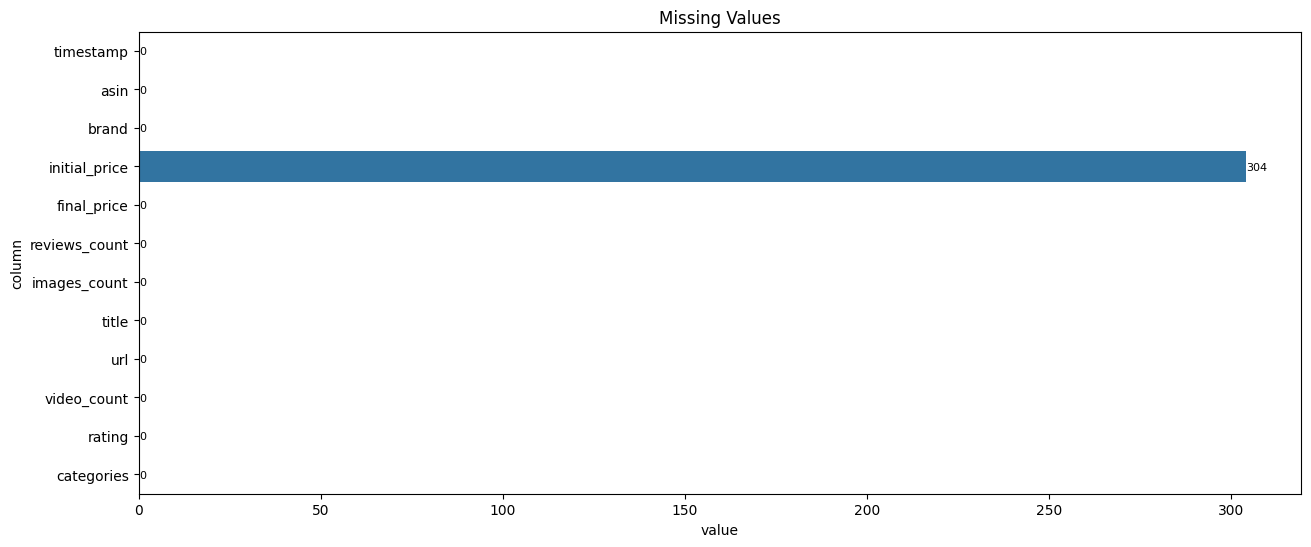

In [17]:
transposed_df = null_counts.toPandas().T.reset_index()

# Renomeando as colunas
transposed_df.columns = ['column','value']

# Definindo do tamanho da figura para o gráfico
plt.figure(figsize = (15,6))

# Criando gráfico de barras horizontais usando Seaborn com o figure size customizado
ax = sns.barplot(x = 'value', y = 'column', data = transposed_df)
sns.set_palette('dark')

# Título do gráfico
plt.title('Missing Values')

# Inserindo Bar Data Labels
for p in ax.patches:
    width = p.get_width()
    value = '{:,.0f}'.format(width)
    x = width + 0.1
    y = p.get_y() + p.get_height() / 2 + 0.1
    ax.annotate(value, (x, y), fontsize = 8)

# Exibindo o gráfico
plt.show()

### Limpeza e transformação de dados: colunas (initial_price & final_price)

In [18]:
# Lista de colunas para aplicar a transformação
columns = ['initial_price', 'final_price']

# Selecionando o primeiro preço se existem dois preços listados
for column in columns:
    df = df.withColumn(column, split(col(column), " ").getItem(0))

# Drop de linhas onde o preço está faltando
df = df.where(~df.initial_price.isin('null','Null','NULL','NaN', 'NAN', ' ',''))

In [19]:
# Verificando novamente se não há valores ausentes nas colunas
null_counts = df.select([count(when(col(c).isNull() | col(c).isin('null','Null','NULL','NaN', 'NAN', ' ',''), c)).alias(c) for c in df.columns[3:5]])

null_counts.toPandas()

,initial_price,final_price
0,0,0


In [20]:
# Removendo "$" das colunas de preço e mudando o data type de string para double
for column in columns:
    df = df.withColumn(column, regexp_replace(col(column), "[US$,]","").cast('double'))

In [21]:
df.limit(1000).toPandas()

,timestamp,asin,brand,initial_price,final_price,reviews_count,images_count,title,url,video_count,rating,categories
0,2023-08-03,B07RGHBLGC,SHNITPWR,23.99,13.99,234,7,SHNITPWR 12V 6A AC DC Power Supply Adapter Con...,https://www.amazon.com/SHNITPWR-Converter-100V...,0,4.4,"Electronics,Power Accessories,AC Adapters"
1,2023-08-15,B09871LZYT,FINTIE,32.99,15.99,1576,1,Fintie Silicone Case for All-New Fire HD 10 an...,https://www.amazon.com/Fintie-Silicone-All-New...,0,4.7,"Electronics,Computers & Accessories,Tablet Acc..."
2,2023-08-16,B09W9BXT9Z,Nixplay,219.99,219.99,1998,1,Nixplay 10.1 inch Touch Screen Digital Picture...,https://www.amazon.com/Nixplay-Digital-W10K-Po...,0,4.6,"Electronics,Camera & Photo,Lighting & Studio,P..."
3,2024-02-04,B0C2YQ9BJ1,Redragon,41.99,39.99,8219,1,"Redragon GS520 RGB Desktop Speakers, 2.0 Chann...",https://www.amazon.com/Redragon-GS520-Speakers...,0,4.4,"Electronics,Computers & Accessories,Computer A..."
4,2024-01-21,B08D3Y5PFZ,AOC,149.99,129.99,14803,1,"AOC C24G1A 24"" Curved Frameless Gaming Monitor...",https://www.amazon.com/AOC-C24G1A-Frameless-19...,0,4.7,"Electronics,Computers & Accessories,Monitors"
...,...,...,...,...,...,...,...,...,...,...,...,...
691,2023-09-11,B0076SIH04,Rockford Fosgate,209.99,189.99,100,1,"Rockford Fosgate P3SD2-10 Punch P3S 10"" 2-Ohm ...",https://www.amazon.com/Rockford-Fosgate-P3SD2-...,0,4.2,"Electronics,Car & Vehicle Electronics,Car Elec..."
692,2023-08-23,B002L5WCLM,StarTech.com,17.99,13.89,419,1,StarTech.com 7ft CAT6a Ethernet Cable - 10 Gig...,https://www.amazon.com/StarTech-com-Cat6a-Ethe...,0,4.7,"Electronics,Computers & Accessories,Computer A..."
693,2024-01-16,B07XBWHR56,SUPERNIGHT,15.99,15.99,1227,1,DC 12V Step Up to 24V 3A Boost Converter 72W D...,https://www.amazon.com/24V-Boost-Converter-Reg...,0,4.5,"Electronics,Power Accessories,Power Converters"
694,2024-01-15,B017JIHJIG,Verbatim,12.00,6.97,1374,1,Verbatim 16GB Metal Executive USB Flash Drive ...,https://www.amazon.com/Verbatim-Metal-Executiv...,0,4.6,"Electronics,Computers & Accessories,Data Stora..."


In [22]:
# Checando schema
df.printSchema()

root
 |-- timestamp: date (nullable = true)
 |-- asin: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- initial_price: double (nullable = true)
 |-- final_price: double (nullable = true)
 |-- reviews_count: integer (nullable = true)
 |-- images_count: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- url: string (nullable = true)
 |-- video_count: integer (nullable = true)
 |-- rating: double (nullable = true)
 |-- categories: string (nullable = true)



### Limpeza da coluna rating

In [23]:
df = df.na.drop(subset = ['rating'])

In [24]:
# Verificando novamente se não há valores ausentes na coluna rating
df.filter(col('rating').isNull()).count()

0

### Selecionando a categoria detalhada da coluna categories (ou seja, o último elemento da lista, a descrição mais granular da categoria)

In [25]:
# Criando coluna array categoria para assim extrairmos o último elemento
df = df.withColumn('cat_array', split(df.categories,','))

In [26]:
# Criando a coluna categoria detalhada
df = df.withColumn('detailed_category', df.cat_array[size(df.cat_array)-1])

In [27]:
pd.options.display.max_colwidth = None

In [28]:
df.select('brand','title','categories','detailed_category').toPandas()

,brand,title,categories,detailed_category
0,SHNITPWR,SHNITPWR 12V 6A AC DC Power Supply Adapter Converter 100V~240V AC to DC 12 Volt 6 Amp 72W LED Driver Transformer with 5.5x2.5mm Plug for 5050 3528 LED Strip 3D Printer CCTV Security System LCD Monitor,"Electronics,Power Accessories,AC Adapters",AC Adapters
1,FINTIE,"Fintie Silicone Case for All-New Fire HD 10 and Fire HD 10 Plus Tablet (Only compatible with 11th Generation 2021 Release) - [Honey Comb] Light Weight Shock Proof Back Cover, Black","Electronics,Computers & Accessories,Tablet Accessories,Bags, Cases & Sleeves,Cases",Cases
2,Nixplay,Nixplay 10.1 inch Touch Screen Digital Picture Frame with WiFi (W10K) - Polished Steel - Share Photos and Videos Instantly via Email or App - Preload Content,"Electronics,Camera & Photo,Lighting & Studio,Photo Studio,Storage & Presentation Materials,Digital Picture Frames",Digital Picture Frames
3,Redragon,"Redragon GS520 RGB Desktop Speakers, 2.0 Channel PC Computer Stereo Speaker with 6 Colorful LED Modes, Enhanced Sound and Easy-Access Volume Control, USB Powered w/ 3.5mm Cable, Pink","Electronics,Computers & Accessories,Computer Accessories & Peripherals,Audio & Video Accessories,Computer Speakers",Computer Speakers
4,AOC,"AOC C24G1A 24"" Curved Frameless Gaming Monitor, FHD 1920x1080, 1500R, VA, 1ms MPRT, 165Hz (144Hz supported), FreeSync Premium, Height adjustable Black","Electronics,Computers & Accessories,Monitors",Monitors
...,...,...,...,...
691,Rockford Fosgate,"Rockford Fosgate P3SD2-10 Punch P3S 10"" 2-Ohm DVC Shallow Subwoofer","Electronics,Car & Vehicle Electronics,Car Electronics,Car Audio,Subwoofers,Component Subwoofers",Component Subwoofers
692,StarTech.com,StarTech.com 7ft CAT6a Ethernet Cable - 10 Gigabit Shielded Snagless RJ45 100W PoE Patch Cord - 10GbE STP Network Cable w/Strain Relief - Blue Fluke Tested/Wiring is UL Certified/TIA (C6ASPAT7BL),"Electronics,Computers & Accessories,Computer Accessories & Peripherals,Cables & Accessories,Cables & Interconnects,Ethernet Cables,Cat 6 Cables",Cat 6 Cables
693,SUPERNIGHT,DC 12V Step Up to 24V 3A Boost Converter 72W DC Voltage Regulator Power Converter Waterproof Module Transformer for Golf Cart Club Car,"Electronics,Power Accessories,Power Converters",Power Converters
694,Verbatim,Verbatim 16GB Metal Executive USB Flash Drive - Silver - 98748,"Electronics,Computers & Accessories,Data Storage,USB Flash Drives",USB Flash Drives


In [29]:
# Contagem de valores distintos na coluna detailed_category
(df.groupBy('detailed_category').count()).count()

224

In [30]:
# Exibindo todas as categorias detalhadas
(df.groupBy('detailed_category').count()).toPandas()

,detailed_category,count
0,MP3 & MP4 Players,3
1,Lens Caps,2
2,Screen Filters,1
3,Headsets,1
4,Power Converters,4
...,...,...
219,Eyepieces,1
220,Complete Tripods,1
221,Security & Surveillance,1
222,Screen Protectors,2


## <span style='color:Yellow'> Obtendo os insights e Respondendo às perguntas-chave </span>

### <span style='color:Yellow'> Quais categorias detalhadas possuem mais produtos ? </span>

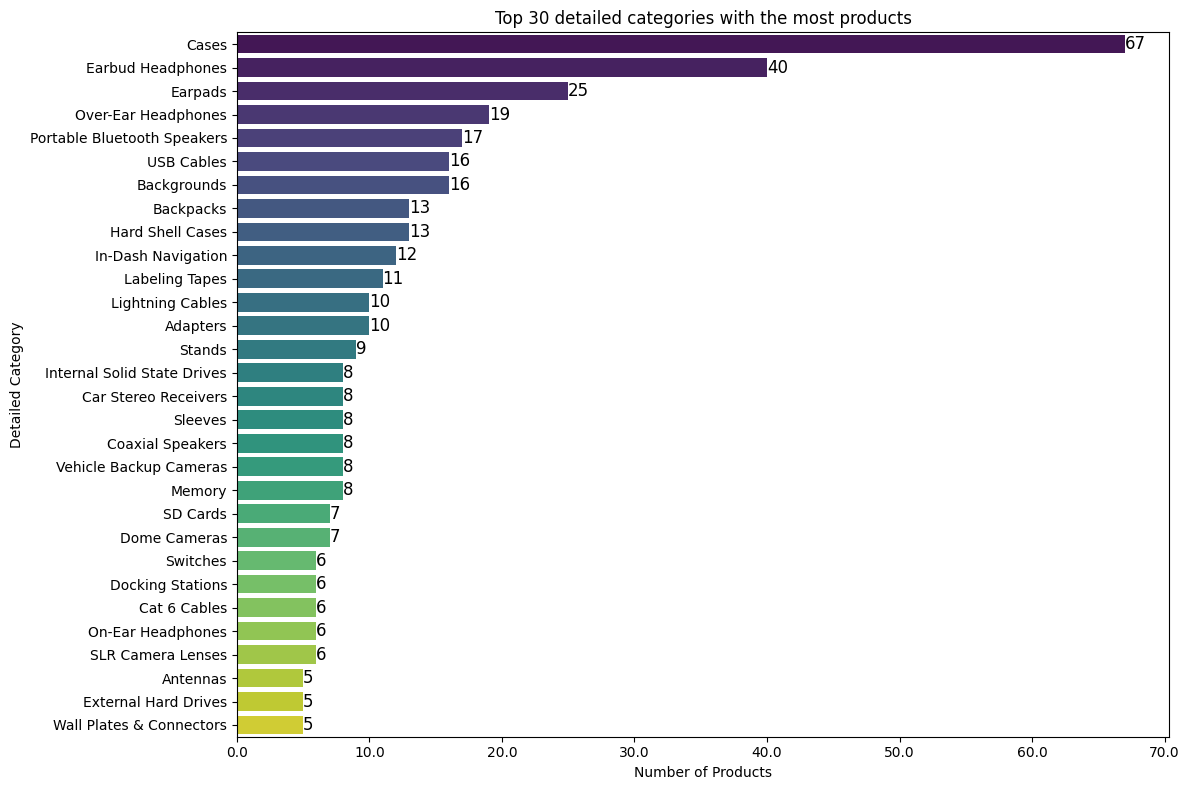

In [31]:
# Group by 'detailed_category' e count do número de linhas de cada categoria
grouped_df = df.groupBy('detailed_category').agg(count("*").alias("count"))

# Order by contagem de categorias em ordem decrescente e com limite de 30 
top30_df = grouped_df.orderBy(col("count").desc()).limit(30).toPandas()

# Criando gráfico de barras horizontais com Seaborn
plt.figure(figsize=(12,8))
ax = sns.barplot(x = "count", y = "detailed_category", hue = "detailed_category", data = top30_df, palette = "viridis")
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x,_:'{:,}'.format(x)))

# Bar Data Labels
for index, value in enumerate(top30_df["count"]):
    ax.text(value, index, f"{value:,.0f}", ha='left', va='center', color='black', fontsize=12)

ax.set_xlabel("Number of Products")
ax.set_ylabel("Detailed Category")
ax.set_title("Top 30 detailed categories with the most products")

plt.tight_layout()
plt.show()

### <span style='color:Yellow'> Análises em específicas categorias detalhadas </span>


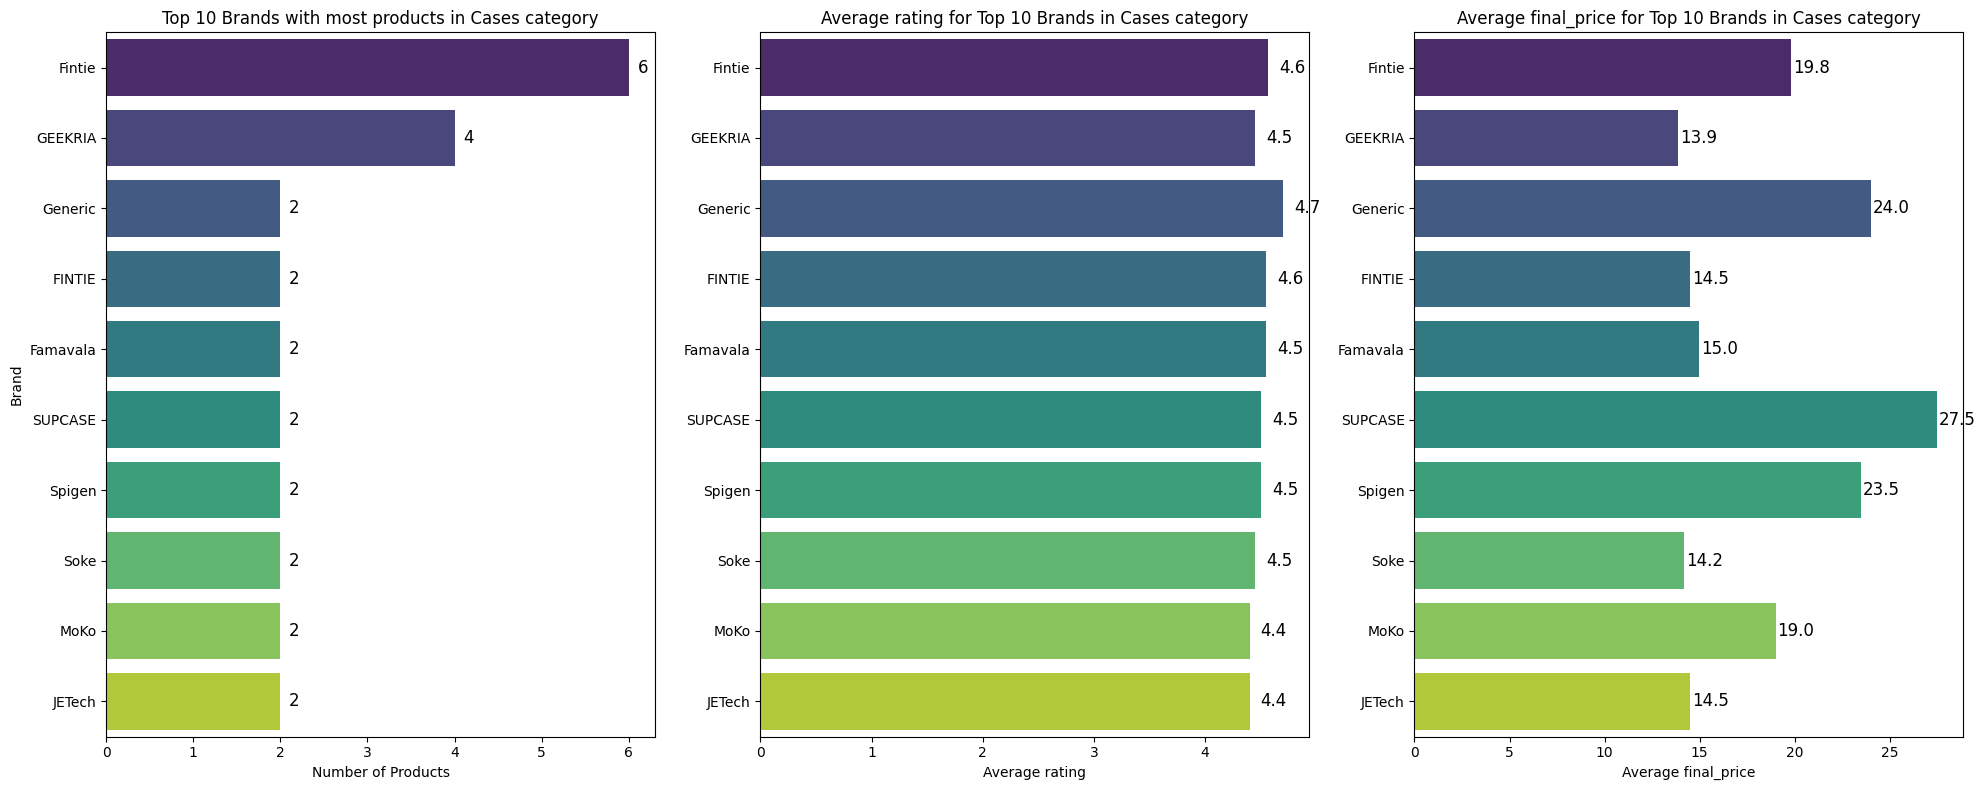

In [32]:
# Definindo as variáveis a serem especificadas 
det_cat = 'Cases'
metric1 = 'rating'
metric2 = 'final_price'

# Filtro DataFrame para manter apenas as linhas onde categoria detalhada
filtered_df = df.filter(col("detailed_category") == det_cat)

# Group by 'brand' e contagem do número de linhas de cada marca
grouped_df = filtered_df.groupBy("brand").agg(count("*").alias("brand_count"))

# Cálculo de média rating para cada marca
avg_metric1_df = filtered_df.groupBy("brand").agg(avg(metric1).alias("avg_rating"))

# Cálculo de média final_price para cada marca
avg_metric2_df = filtered_df.groupBy("brand").agg(avg(metric2).alias("avg_final_price"))

# Join dos três DataFrames com marca ("brand") como parâmetro para as combinar informações
pandas_df = grouped_df.join(avg_metric1_df, on = "brand", how = "inner").join(avg_metric2_df, on = "brand", how = "inner").toPandas()

# Ordenando o DataFrame em ordem decrescente baseado na contagem de marca e rating
pandas_df = pandas_df.sort_values(by = ["brand_count", "avg_rating"], ascending = False)

# Limitando o resultado para as top 10 marcas por contagem e rating
pandas_df = pandas_df.head(10)

# Criando figura com três subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

# Plot do PRIMEIRO gráfico de barras horizontais por contagem de marca (brand_count)
sns.barplot(x="brand_count", y = "brand", hue = "brand", data = pandas_df, palette="viridis", ax=axes[0])

# Definindo pequeno offset para os data labels
label_offset = 0.1

# Bar Data Labels brand_count
for index, value in enumerate(pandas_df["brand_count"]):
    axes[0].text(value + label_offset, index, f"{value:,.0f}", ha='left', va='center', color='black', fontsize=12)

# Formatando labels eixo-x brand_count
axes[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Definindo labels e título para o PRIMEIRO plot
axes[0].set_xlabel("Number of Products")
axes[0].set_ylabel("Brand")
axes[0].set_title("Top 10 Brands with most products in " + det_cat + " category")

# Plot do SEGUNDO gráfico de barras horizontais por média rating
sns.barplot(x="avg_rating", y="brand", hue="brand", data=pandas_df, palette="viridis", ax=axes[1])

# Bar Data Labels avg_rating 
for index, value in enumerate(pandas_df["avg_rating"]):
    axes[1].text(value + label_offset, index, f"{value:.1f}", ha='left', va='center', color='black', fontsize=12)

# Definindo labels e título para o SEGUNDO plot
axes[1].set_xlabel("Average " + metric1)
axes[1].set_ylabel("")  # Escondendo ylabel do SEGUNDO plot
axes[1].set_title("Average " + metric1 + " for Top 10 Brands in " + det_cat + " category")

# Plot do TERCEIRO gráfico de barras horizontais por média final_price
sns.barplot(x="avg_final_price", y="brand", hue="brand", data=pandas_df, palette="viridis", ax=axes[2])

# Bar Data Labels avg_final_price
for index, value in enumerate(pandas_df["avg_final_price"]):
    axes[2].text(value + label_offset, index, f"{value:.1f}", ha='left', va='center', color='black', fontsize=12)

# Definindo labels e título para o TERCEIRO plot
axes[2].set_xlabel("Average " + metric2)
axes[2].set_ylabel("")  # Escondendo ylabel do TERCEIRO plot
axes[2].set_title("Average " + metric2 + " for Top 10 Brands in " + det_cat + " category")

# Ajustando espaçamento entre subplots
plt.tight_layout()

# Exibindo gráficos
plt.show()

### <span style='color:Yellow'> Análises aprofundadas em marcas e produtos específicos </span>

In [33]:
#brands = ['SUPCASE', 'Spigen'] # Expensive (final_price alto)
#brands = ['Fintie', 'MoKo'] # Medium (final_price médio)
brands = ['GEEKRIA', 'Soke'] # Cheap (final_price baixo)

# Filtrando produtos das marcas específicas e ordenando por maior rating e maior reviews_count
(df.filter((col('brand').isin(brands)) & (col('detailed_category') == det_cat))
    .orderBy(['rating', 'reviews_count'], ascending=[0, 0])
    .toPandas())

,timestamp,asin,brand,initial_price,final_price,reviews_count,images_count,title,url,video_count,rating,categories,cat_array,detailed_category
0,2023-08-16,B093RY2NTW,Soke,19.99,19.99,2226,1,"Soke iPad Pro 12.9 Case 2022 2021 with Pencil Holder - [Full Body Protection + 2nd Gen Apple Pencil Charge + Auto Wake/Sleep], Soft TPU Back Cover for iPad Pro 12.9 inch 6th 5th Generation(Black)",https://www.amazon.com/Soke-iPad-12-9-Pencil-Holder/dp/B08Y5FG8XF,0,4.5,"Electronics,Computers & Accessories,Tablet Accessories,Bags, Cases & Sleeves,Cases","[Electronics, Computers & Accessories, Tablet Accessories, Bags, Cases & Sleeves, Cases]",Cases
1,2023-09-10,B01N4IMMHC,GEEKRIA,14.99,14.99,78,1,"Geekria Shield Headphones Case Compatible with Bose QC Ultra, QC45, NC 700, QC35, QC25, QC15, QC SE Case, Replacement Hard Shell Travel Carrying Bag with Cable Storage (Dark Grey)",https://www.amazon.com/Geekria-UltraShell-Headphones-Protective-Accessories/dp/B01N4IMMHC,0,4.5,"Electronics,Headphones, Earbuds & Accessories,Cases","[Electronics, Headphones, Earbuds & Accessories, Cases]",Cases
2,2023-09-10,B01M3SDSYW,GEEKRIA,15.55,12.59,58,1,"Geekria Shield Case Compatible with Bose QC Ultra, 700, QC35 Gaming, QC35 II, QC35, QC SE Headphones, Replacement Protective Hard Shell Travel Carrying Bag with Cable Storage (Grey)",https://www.amazon.com/Geekria-UltraShell-Headphones-Protective-Accessories/dp/B01M3SDSYW,0,4.5,"Electronics,Headphones, Earbuds & Accessories,Cases","[Electronics, Headphones, Earbuds & Accessories, Cases]",Cases
3,2023-09-10,B019XLBZXM,GEEKRIA,21.05,18.99,524,1,"Geekria Shield Headphones Case Compatible with Bang & Olufsen Beoplay H9i, H95, H9, H8, H8i, H6, H4 Case, Replacement Hard Shell Travel Carrying Bag with Cable Storage (Dark Grey)",https://www.amazon.com/UltraShell-Headphones-OLUFSEN-SoundTrue-Carrying/dp/B019XLBZXM,0,4.4,"Electronics,Headphones, Earbuds & Accessories,Cases","[Electronics, Headphones, Earbuds & Accessories, Cases]",Cases
4,2023-08-16,B08Y5J3KLG,Soke,11.99,8.39,106,1,"Soke New iPad Pro 12.9 Case 5th Generation 2021, Premium Leather Stand Folio Case with Pocket[2nd Gen Apple Pencil Charging+Auto Wake/Sleep], Hard PC Back Cover for iPad Pro 12.9 Inch(Rosegold)",https://www.amazon.com/Soke-Generation-Premium-Charging-Rosegold/dp/B09B57BL1N,0,4.4,"Electronics,Computers & Accessories,Tablet Accessories,Bags, Cases & Sleeves,Cases","[Electronics, Computers & Accessories, Tablet Accessories, Bags, Cases & Sleeves, Cases]",Cases
5,2023-09-10,B0771DBFHW,GEEKRIA,9.50,8.90,64,1,"Geekria Shield Headphones Case Compatible with Skullcandy Ink'd+, Ink'd 2, Chops Flex in-Ear Sport Earbuds, Replacement Protective Hard Shell Travel Carrying Bag with Cable Storage (Black)",https://www.amazon.com/Wireless-Bluetooth-Skullcandy-Carrying-Accessories/dp/B0771DBFHW,0,4.4,"Electronics,Headphones, Earbuds & Accessories,Cases","[Electronics, Headphones, Earbuds & Accessories, Cases]",Cases


### <span style='color:Yellow'> Rating X Reviews </span>

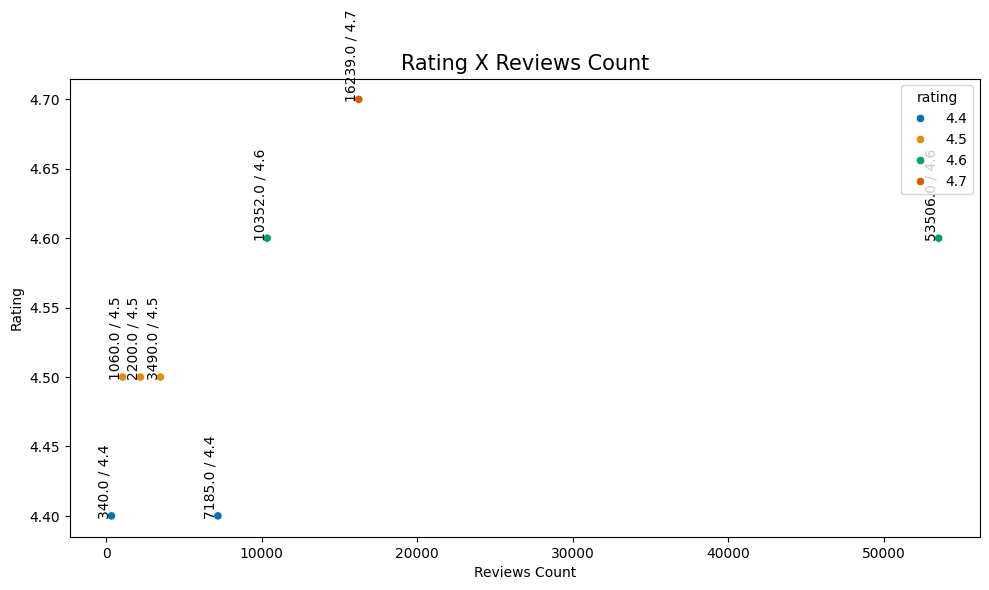

In [34]:
#brands = ['SUPCASE', 'Spigen'] # Expensive (final_price alto)
brands = ['Fintie', 'MoKo'] # Medium (final_price médio)
#brands = ['GEEKRIA', 'Soke'] # Cheap (final_price baixo)

# Filtrando produtos das marcas específicas
df_filtered = df.filter((col('brand').isin(brands)) & (col('detailed_category') == det_cat))

# Selecionando apenas as colunas de classificação e número de avaliações
rating_reviews_df = df_filtered.select('rating', 'reviews_count').toPandas()

# Plotando um scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rating_reviews_df, x='reviews_count', y='rating', hue='rating', palette='colorblind')

spacing = 10
# Adicionando labels  com as informações de reviews_count e rating em cada ponto
for index, row in rating_reviews_df.iterrows():
    plt.text(row['reviews_count'], row['rating'], f"{row['reviews_count']} / {row['rating']}", fontsize=10, ha='right', rotation=90)
    
# Customizando plot (título e labels)
plt.xlabel("Reviews Count")
plt.ylabel("Rating")
plt.title("Rating X Reviews Count", fontsize=15)

plt.tight_layout()

# Exibindo gráfico
plt.show()